In [ ]:
#Random forest is among the most commonly used ensemble methods, and consists
#of a collection of decision trees. The idea is to repeatedly select data from
#the data set, with replacement(known as bootstrapping), and build a decision
#tree with each new sample. Because of this replacement, some data points will
#not be included, and some will be included more than once. We can use these
#non-included data points to cross-validate each tree individually. Typically
#about 1/3 of the data is left out per tree, and after calculating the percent
#of these data points with a correct prediction, we get the out-of-bag error,
#which is typically sufficient in judging the model's accuracy.

In [1]:
#Publicly available data from LendingClub.com from 2007-2010. 
#Goal: classify and predict whether or not the borrower paid back their loan
#in full. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read in the data as a dataframe

loans = pd.read_csv('loan_data.csv')

In [4]:
#Check out the data

loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
#Exploratory data analysis
#A histogram of two FICO distributions on top of each other, one for each
#credit.policy outcome: 1 if the customer meets the credit underwriting
#criteria of LendingClub.com, and 0 otherwise.

Text(0.5, 0, 'FICO')

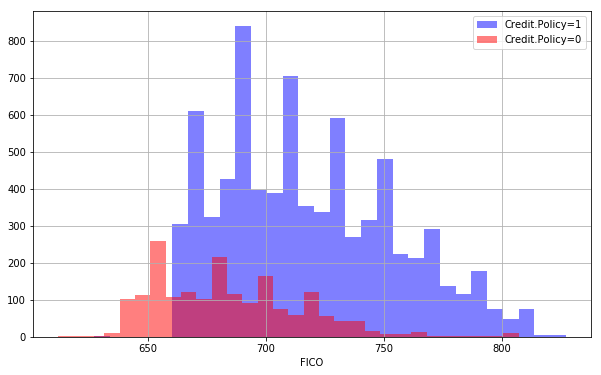

In [8]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                             bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                             bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

In [9]:
#Similar figure, but using the not.fully.paid column: 1 if the loan was not
#fully paid, 0 otherwise.

Text(0.5, 0, 'FICO')

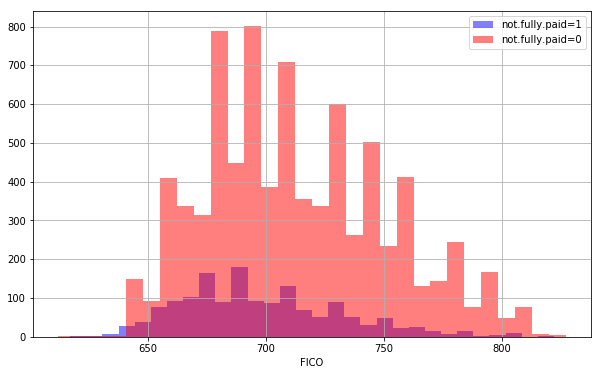

In [10]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

In [11]:
#Looks like most borrowers did repay their loan in full.

In [12]:
#Let's see if there are certain types of loans that are more likely
#to not be paid in full

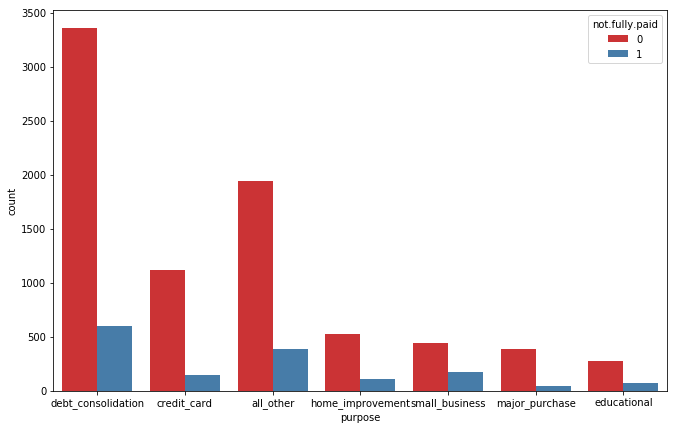

In [13]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

In [14]:
#We can also take a look at the trend between FICO score and interest rate

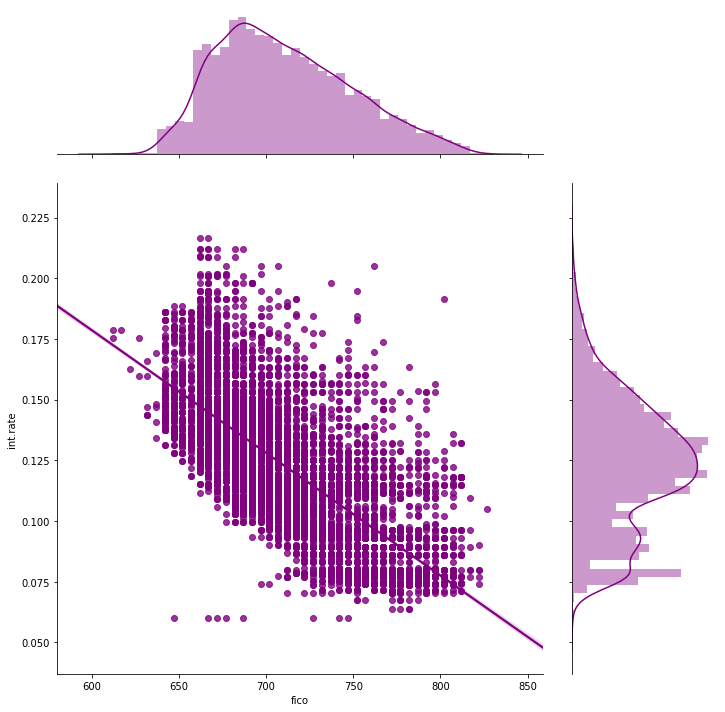

In [21]:
sns.jointplot(x='fico',y='int.rate',data=loans,height=10,ratio=3,kind='reg',
             color='purple')

In [22]:
#In general, a higher FICO score will result in a lower interest rate

In [23]:
#We can also see if this trend differed between not.fully.paid and credit.policy

<Figure size 792x504 with 0 Axes>

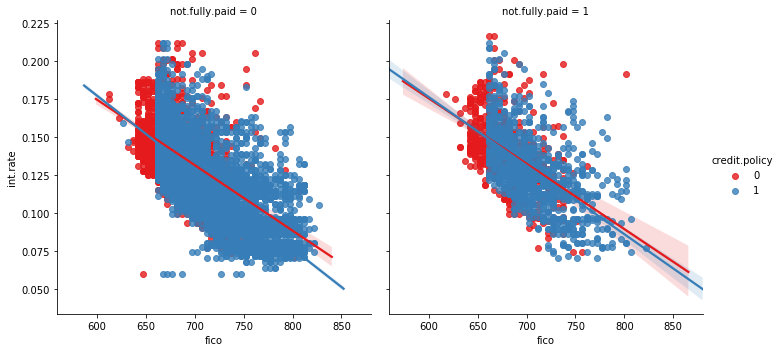

In [31]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
          col='not.fully.paid',palette='Set1')

In [32]:
#Looks like borrowers who didn't meet the credit underwriting criteria but still
#received loans had lower FICO scores and higher interest rates in both outcomes,
#which agrees with the trend in the jointplot above. Those who did meet the
#criteria generally had FICO scores higher than 650 and generally had
#lower interest rates.

In [33]:
#Time to set up the data for random forest classification. As the purpose column
#is categorical, we need to transform it using dummy variables so that
#sklearn can understand them.

In [34]:
cat_feats = ['purpose']

In [35]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [36]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [37]:
#Now we have 6 new columns representing the different purposes for loans.
#Time to split into training and testing sets.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

In [42]:
#Start by creating a single decision tree first

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
#Create an instance of DecisionTreeClassifier() and fit to the training data

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
#Create predictions from the test set and evaluate accuracy

In [48]:
predictions = dtree.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[2255  395]
 [ 393  118]]


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2650
           1       0.23      0.23      0.23       511

   micro avg       0.75      0.75      0.75      3161
   macro avg       0.54      0.54      0.54      3161
weighted avg       0.75      0.75      0.75      3161



In [51]:
#Decision tree is about 75% accurate in predicting whether a borrower
#will pay back their loan in full or not. Let's see if the random forest
#can do better.

In [52]:
#Create instance of RandomForestClassifier() and fit the data

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=600)

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
#Predict against y_test values and evaluate accuracy
pred = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[2635   15]
 [ 502    9]]


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.38      0.02      0.03       511

   micro avg       0.84      0.84      0.84      3161
   macro avg       0.61      0.51      0.47      3161
weighted avg       0.76      0.84      0.77      3161



In [ ]:
#Even though the number of false positives is relatively high in the random forest (502), this is not
#necessarily a negative outcome. It means that 502 times, the model predicted that the
#borrower would not pay back the loan, when in fact they did pay back the loan.
#However, if the model predicts the borrower won't pay back the loan, then it's
#safe to assume that they wouldn't receive the loan, so the lender doesn't lose
#money. It's essentially a bet that they would've won if they took, but decided
#not to take. So the random forest predicts much more conservatively in this situation
#than the decision tree, which is much preferred in the long run, as it minimizes the 
#number of occurences where the model predicts that the loan will be paid back, when
#in fact it is not paid back.